In [1]:
using Plots

In [2]:
using SpecialFunctions

# Zad

In [3]:
λ₁(t)=1+cos(t)
λ₂(t)=1/50*t^2
λ₃(t)=10*exp(-t^2)
λ₄(t)=sin(t)^2;

In [4]:
T=10;

In [5]:
λ¹=2
λ²=2
λ³=1
λ⁴=1;

In [6]:
Exp(λ)=-1/λ*log(rand())

Exp (generic function with 1 method)

In [7]:
JPP(λ,T)=begin
    a=[Exp(λ)]
    while a[end]<T
        push!(a,a[end]+Exp(λ))
    end
    return a[1:end-1]
end

JPP (generic function with 1 method)

In [8]:
JPP(λ¹,T)

14-element Vector{Float64}:
 0.007046630956904498
 0.039829470954648234
 2.718455405354436
 3.1153423697670277
 3.184474591902449
 3.549379215929784
 4.728460879838895
 4.936664981550379
 5.322442458822126
 6.010664179279998
 6.7081076443723395
 6.924106320731819
 8.205880133489508
 9.872241850795053

In [9]:
NPP₁(λₙ,T,λ)=begin
    a=JPP(λₙ,T)
    U=rand(length(a))
    a[(λ.(a)./λₙ).>U]
end

NPP₁ (generic function with 1 method)

In [10]:
NPP₁(λ¹,T,λ₁)

10-element Vector{Float64}:
 0.0976037754733841
 0.400094848142568
 0.5724775326528385
 2.4604194065169334
 4.560394148606468
 4.990838665703724
 5.070303932673708
 5.210277578037179
 5.314783370698326
 7.322465535820937

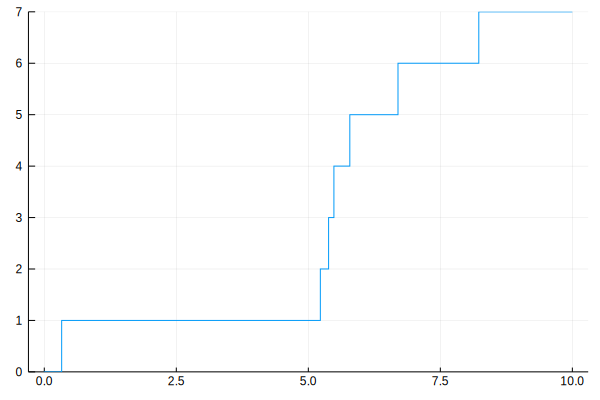

In [12]:
a=append!(append!([0.0],NPP₁(λ¹,T,λ₁)),T)
#a=append!(append!([0.0],NPP₁(λ²,T,λ₂)),T)
#a=append!(append!([0.0],NPP₁(λ³,T,λ₃)),T)
#a=append!(append!([0.0],NPP₁(λ⁴,T,λ₄)),T)

plot(a, -1:length(a)-2, linetype=:steppre, leg=false, ylim=(0,length(a)-2))

# Zad 2

In [17]:
using QuadGK
using Distributions

λ₁(t)=1+cos(t)
λ₃(t)=10*exp(-t^2)
Λ(λ,tₚ, tₖ)=quadgk(λ, tₚ, tₖ, rtol=1e-3)

Λ (generic function with 1 method)

In [34]:
N=quantile(Poisson(Λ(λ₃,0,T)[1]),rand())

7

In [45]:
a=sort([quantile(Normal(0,1/sqrt(2)), rand()) for i in 1:N])

7-element Vector{Float64}:
 -1.0069656158136775
 -0.5368739229366348
  0.028259337904153227
  0.10800149144075247
  0.20339313568782036
  0.3163104909398873
  0.5534106173282121

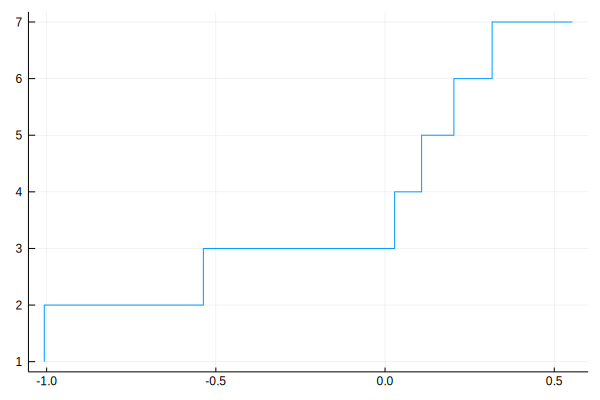

In [46]:
plot(a,1:N, linetype=:steppre, leg=false)

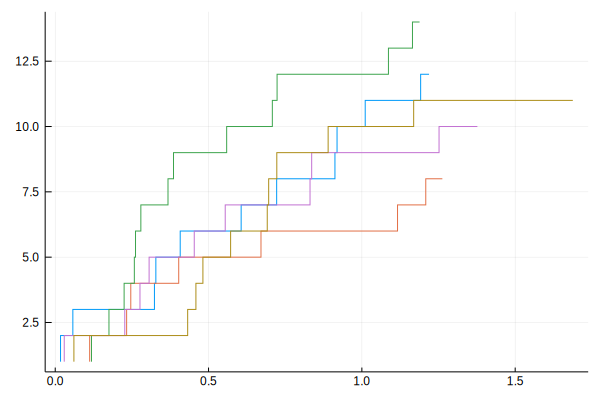

In [68]:
plot()
for j in 1:5
N=quantile(Poisson(Λ(λ₃,0,T)[1]),rand())
a=sort(abs.([quantile(Normal(0,1/sqrt(2)), rand()) for i in 1:N]))
plot!(a,1:N, linetype=:steppre, leg=false)
end
plot!()

# Metoda 3

In [8]:
using QuadGK
using Distributions
Λ(λ,tₚ, tₖ)=quadgk(λ, tₚ, tₖ, rtol=1e-3)

Λ (generic function with 1 method)

In [34]:
Λ(t->sin(t)^2,0,pi*2)[1]

3.1415926535896586

In [35]:
X=Poisson(2)

Poisson{Float64}(λ=2.0)

In [27]:
cdf(X,0)

0.1353352832366127

In [31]:
quantile(X,0.999)

8

In [110]:
N(10,λ₁)

11

In [111]:
N(T,λ)=quantile(Poisson(Λ(λ,T)[1]),rand())

N (generic function with 1 method)

In [99]:
F(x,Tₖ,λ)=1-exp(-Λ(λ,Tₖ,Tₖ+x)[1])

F (generic function with 1 method)

In [98]:
λ₁

λ₁ (generic function with 1 method)

In [103]:
quantile(x->F(x,0,λ₁),rand())

LoadError: MethodError: no method matching length(::var"#17#18")
[0mClosest candidates are:
[0m  length([91m::Union{Base.KeySet, Base.ValueIterator}[39m) at abstractdict.jl:58
[0m  length([91m::Union{ZMQ._Message, Base.RefValue{ZMQ._Message}}[39m) at C:\Users\Kacper\.julia\packages\ZMQ\R3wSD\src\_message.jl:31
[0m  length([91m::Union{DataStructures.SortedDict, DataStructures.SortedMultiDict, DataStructures.SortedSet}[39m) at C:\Users\Kacper\.julia\packages\DataStructures\DLSxi\src\container_loops.jl:331
[0m  ...

In [68]:
A=[]
while A[end]<T
    append!(A,A[end]+N(T,λ₃))
end

In [69]:
A

3-element Vector{Int64}:
  0
  6
 16

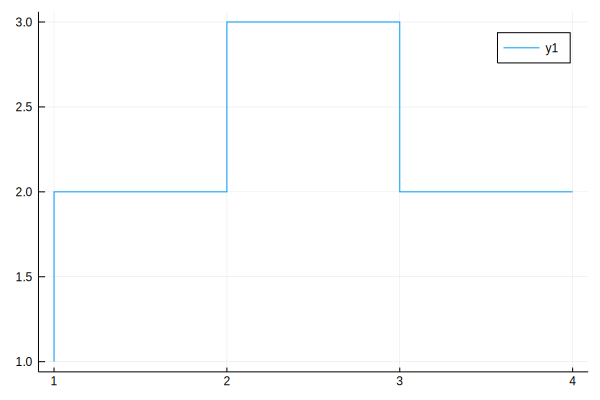

In [52]:
plot(1:4,linetype=:steppre)

# nic